In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
os.chdir(path)

In [3]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [4]:
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [5]:
# normatizando os dados (existe forma automatica de fazer nao discutiremos
def normalizeCols(M):
    Num=len(M.columns)
    for i in range(Num):
        Max=float(np.max(M.iloc[:,[i]]))
        Min=float(np.min(M.iloc[:,[i]]))
        a=(Max+Min)/2
        b=(Max-Min)/2
        M.iloc[:,[i]] = M.iloc[:,[i]].apply(lambda x: (x-a)/b)
    return M
DAT=normalizeCols(Dat_Select)
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605


In [6]:
X=DAT.iloc[:,[2,3]]
print(X.head())

   Resistence   Sinkage
0   -1.000000 -0.883085
1   -0.986458 -0.895478
2   -0.980729 -0.898111
3   -0.966146 -0.916618
4   -0.956354 -0.924482


In [7]:
Index=[2,3,4,5]
Dat_Select=[]
Y=DAT.iloc[:,Index].copy()
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


In [8]:
# parte futura.....
#train=data.sample(frac=0.4,random_state=200)
#test=data.drop(train.index)

In [9]:
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


In [10]:
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [11]:
clf.fit(X, Y)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
W=clf.predict(X)

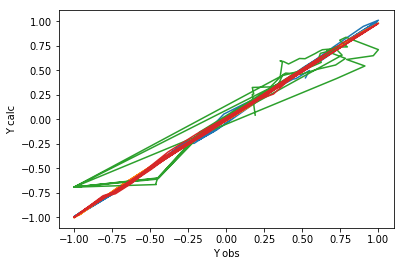

In [13]:
# plot results
plt.plot(Y,W)
plt.xlabel('Y obs')
plt.ylabel('Y calc')
plt.show()

In [14]:
print(W[0:5,:])

[[-0.99460209 -0.87616488 -0.6924928  -0.99810132]
 [-0.97993099 -0.8874524  -0.66605657 -0.99876307]
 [-0.97487506 -0.89028657 -0.65704438 -0.99874942]
 [-0.95640971 -0.90647294 -0.62429381 -0.99930575]
 [-0.94601848 -0.91394149 -0.60612231 -0.99914316]]


In [15]:
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


Text(0.5,0,'Resist Obs')

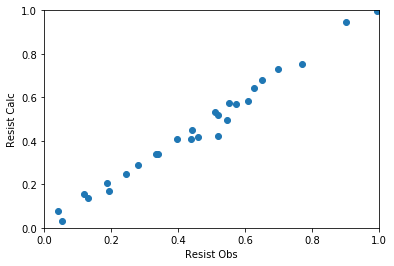

In [16]:
resist_obs=[]
resist_calc=[]
resist_calc=W[:,0].copy()
resist_obs=Y['Resistence'].copy()
#print(resist_calc)
#print(resist_obs)
plt.scatter(resist_obs,resist_calc)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')


In [17]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
Index=[4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [18]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x
W=pd.DataFrame(W)
col_names=list(Dat_Select)
W.columns = col_names # apage este linha para ver o q acontece...
W=Original(W,Dat_Select) 
print(W.head())

   Resistence   Sinkage      Trim     Power
0    1.016360  0.384735  0.769749  3.085458
1    3.778748 -0.242816  0.835924  2.010074
2    4.730717 -0.400387  0.858483  2.032263
3    8.207515 -1.300300  0.940464  1.128197
4   10.164055 -1.715528  0.985951  1.392416


Text(0.5,0,'Resist Obs')

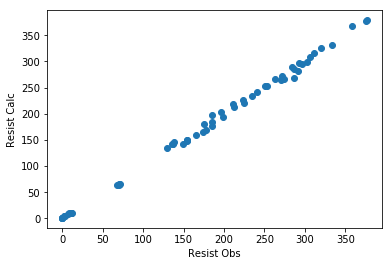

In [19]:
resist_obs=[]
resist_calc=[]
resist_calc=W['Resistence'].copy()
resist_obs=Dat_Select['Resistence'].copy()
plt.scatter(resist_obs,resist_calc)
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')

In [20]:
ynew = np.c_[resist_obs,resist_calc]

In [21]:
print(ynew)

[[   0.            1.01635989]
 [   2.549729      3.77874752]
 [   3.6284605     4.73071662]
 [   6.3743225     8.20751471]
 [   8.2179727    10.16405471]
 [  10.36562905   10.38322693]
 [  66.9794195    64.5289641 ]
 [ 129.5458465   135.10967241]
 [ 153.768272    150.60019341]
 [ 184.757286    176.62843836]
 [ 224.572285    220.52860784]
 [ 250.9521735   252.08909292]
 [ 262.81822     265.48634201]
 [ 284.39285     288.68291726]
 [ 292.23817     296.24943502]
 [ 306.163613    309.10766144]
 [ 375.398562    376.39782908]
 [   0.            1.01635989]
 [  11.13054775   11.11239643]
 [  69.627215     64.67566132]
 [ 136.8027675   142.97746869]
 [ 154.4547375   148.93912043]
 [ 177.500365    168.80711704]
 [ 198.5846625   194.05803547]
 [ 212.804305    213.77943487]
 [ 241.24359     242.2682787 ]
 [ 271.644205    273.04759621]
 [ 310.870805    315.9570236 ]
 [ 319.69679     325.94499548]
 [ 357.942725    366.8424962 ]
 [ 376.57536     378.61251041]
 [   0.            1.01635989]
 [  10.8

In [22]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(train.head())
print("==============")
print(train.shape[0])
print("==============")
print(test.head())
print("==============")
print(test.shape[0])

    Unnamed: 0  Case  Hydrofoil    Froude  Resistence    Sinkage      Trim  \
35          36    36          3  0.829864  154.454737  29.937597  4.156960   
31          32    32          3  0.000000    0.000000   0.000000  0.000000   
29          30    30          2  2.240634  357.942725  89.609948  3.426487   
51          52    52          4  1.244797  174.558370  69.942361  4.066262   
23          24    24          2  1.244797  198.584663  59.819143  3.967196   

          Power  
35   460.864971  
31     0.000000  
29  2883.697961  
51   781.275856  
23   888.811015  
47
    Unnamed: 0  Case  Hydrofoil    Froude  Resistence    Sinkage      Trim  \
7            8     8          1  0.622398  129.545847   9.513175  4.409404   
13          14    14          1  1.867195  284.392850  81.246826  4.922507   
14          15    15          1  2.026944  292.238170  84.130501  4.484304   
25          26    26          2  1.659729  241.243590  77.760720  3.708596   
37          38    38          

In [23]:
Index=[4,5,6,7]
y_test=[]
y_train=[]
y_test=test.iloc[:,Index].copy()
y_train=train.iloc[:,Index].copy()
Index=[2,3]
x_test=[]
x_train=[]
x_test=test.iloc[:,Index].copy()
x_train=train.iloc[:,Index].copy()

In [24]:
def Codifica(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x
y_train_old=[]
y_train_old=y_train.copy()
x_train_old=[]
x_train_old=x_train.copy()
col_names=list(Dat_Select)
W.columns = col_names # apage este linha para ver o q acontece...
x_train=Codifica(x_train,x_train_old) 
y_train=Codifica(y_train,y_train_old) 
x_test=Codifica(x_test,x_train_old) 
y_test=Codifica(y_test,y_train_old) 
print(y_test.head())

    Resistence   Sinkage      Trim     Power
7    -0.311979 -0.711975  0.761513 -0.821602
13    0.510417  0.578270  0.966493  0.174914
14    0.552083  0.630138  0.791435  0.310618
25    0.281250  0.515567  0.481548 -0.114088
37   -0.019792  0.271105  0.783812 -0.491681


In [25]:
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [26]:
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [27]:
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [28]:
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())

   Resistence   Sinkage      Trim     Power
0   -0.148628 -0.362080  0.732977 -0.734439
1   -0.976626 -0.880240 -0.962391 -1.003720
2    0.837659  0.784199  0.340408  0.720254
3   -0.063406  0.401304  0.529070 -0.529966
4    0.058370  0.180131  0.554061 -0.476177


In [29]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x
y_calc_train=Original(y_calc_train,y_train_old)
y_obs_train=Original(y_train,y_train_old)
y_calc_test=Original(y_calc_test,y_train_old) 
y_obs_test=Original(y_test,y_train_old)

In [30]:
resist_obs_train=[]
resist_calc_train=[]
resist_calc=y_calc_train['Resistence'].copy()
resist_obs=y_train_old['Resistence'].copy()

Text(0.5,0,'Resist Obs')

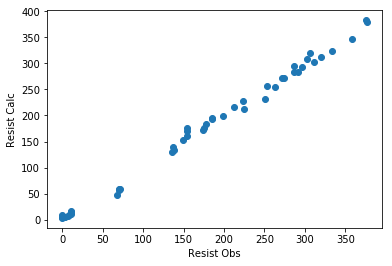

In [31]:
plt.scatter(resist_obs,resist_calc)
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')

In [40]:
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=y_obs_test['Resistence'].copy()
print(resist_obs_test.head())

7     129.545847
13    284.392850
14    292.238170
25    241.243590
37    184.561153
Name: Resistence, dtype: float64


Text(0.5,0,'Resist Obs')

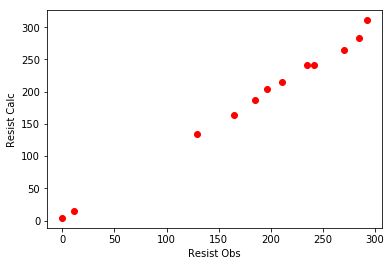

In [42]:
plt.scatter(resist_obs_test,resist_calc_test,c='red')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')

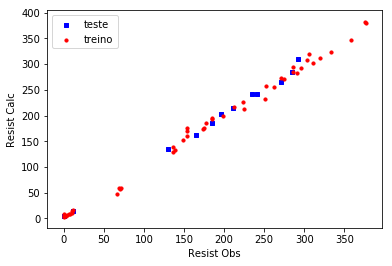

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs,resist_calc, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()